Lab 3, Aleksandr Berezutskii, group 4, Skoltech 2018

Determining and removing drawbacks of exponential and running mean. Task 1

The objective of this laboratory work is to determine conditions for which broadly used
methods of running and exponential mean provide effective solution and conditions under which
they break down. Important outcome of this exercise is getting skill to choose the most effective
method in conditions of uncertainty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Part I. Backward exponential smoothing


In part II of lab 2 we have already applied running and exponential mean (which is actually forward exponential mean) methods to random walk model with noise statistics $\sigma_W=28$ and $\sigma_\eta=97$. In these conditions it can be truly seen that the results of exponential smoothing demonstrated significant shift (delay) of estimations.

In [2]:
#noise
sigmaW=28
W=np.random.normal(loc=0.0, scale=sigmaW, size=300)
#steps
X=np.zeros(len(W))
X[0]=10
#trajectory
for i in range(len(W)):
    X[i]=X[i-1]+W[i]
#measurement noise
sigmaeta=97
eta=np.random.normal(loc=0.0, scale=sigmaeta, size=300)
#measurements of the steps
Z = np.zeros(len(W))
for i in range(len(W)):
    Z[i] = X[i] + eta[i]
#introducing chi, alpha and M
chi=(sigmaW/sigmaeta)**2
a=(-chi+np.sqrt(chi**2+4*chi))/2
M=int((2-a)/a)

In [3]:
#forward exponential smoothing
XFES = np.zeros(len(W))
XFES[0] = X[0]

for i in range(2,len(W)):
    XFES[i] = XFES[i-1] + a*(Z[i]-XFES[i-1])

In [4]:
#running mean
XRM = np.zeros(len(W))

for i in range(int((M-1)/2), len(W)-int((M-1)/2)):
    for k in range(i-int((M-1)/2), i+int((M-1)/2)):
        XRM[i] = XRM[i] + (1/M)*Z[k]
        
for i in range(len(W)-int((M-1)/2), len(W)):
    XRM[i] = Z[i]

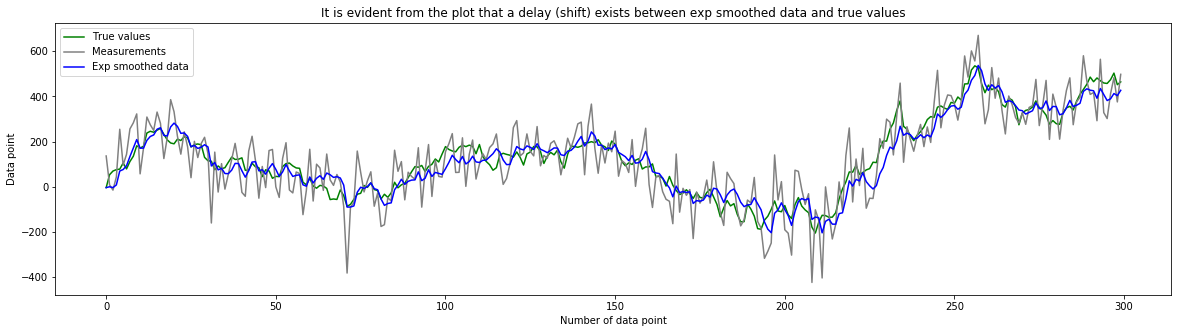

In [5]:
plt.figure(figsize=(20,5))
plt.plot(X, '-', color='green', label='True values')
plt.plot(Z, '-', color='gray', label='Measurements')
plt.plot(XFES, '-', color='blue', label='Exp smoothed data')
plt.title('It is evident from the plot that a delay (shift) exists between exp smoothed data and true values')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements', 'Exp smoothed data'], loc = 'best')

plt.show()

Now we'll apply backward exponential smoothing to forward exponential estimates to smooth measurement errors even further.

In [6]:
#backward exponential smoothing
XBES = np.zeros(len(W))

XBES[len(W)-1] = XFES[len(W)-1]

for i in range(len(W)-2, 0, -1):
    XBES[i] = XBES[i+1] + a*(XFES[i] - XBES[i+1])

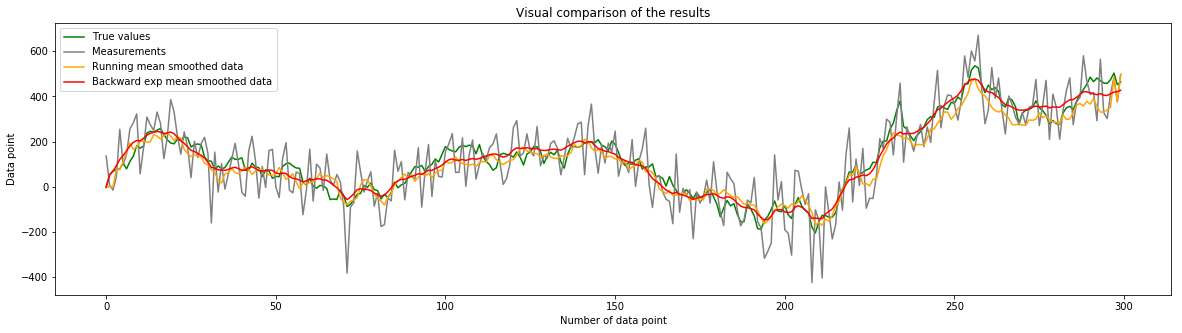

In [7]:
plt.figure(figsize=(20,5))
plt.plot(X, '-', color='green', label='True values')
plt.plot(Z, '-', color='gray', label='Measurements')
plt.plot(XRM, '-', color='orange', label='Running mean smoothed data')
plt.plot(XBES, '-', color='red', label='Backward exp mean smoothed data')
plt.title('Visual comparison of the results')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements', 'Running mean smoothed data','Backward exp mean smoothed data'], loc = 'best')

plt.show()

Here it can be seen that backward exponential mean of forward exponential smoothed data provides better accuracy by eliminating the delay

Now let's compare estimation results of running mean and backward exponential smoothing using the following indicators

Deviation indicator
$$
I_d = \sum_{i=1}^N(Z_i - \hat{X}_i)^2
$$

In [8]:
DIRM=0
DIBES=0
for i in range(len(W)):
    DIRM += (Z[i] - XRM[i])**2
    DIBES += (Z[i] - XBES[i])**2

In [9]:
print('Deviation indicator for running mean is', DIRM)
print('Deviation indicator for backward exp smoothing is', DIBES)

Deviation indicator for running mean is 2818563.16241
Deviation indicator for backward exp smoothing is 2484734.94114


They're pretty much close so we can't decide which method is better

Variability indicator
$$
I_v = \sum_{i=1}^{N-2}(\hat{X}_{i+2}-2\hat{X}_{i+1}+\hat{X}_i)^2
$$
where $Z_i$ - measurements, $\hat{X_i}$ - estimations

In [10]:
VIRM=0
VIBES=0
for i in range(len(W)-2):
    VIRM += (XRM[i+2] - 2*XRM[i+1] + XRM[i])**2
    VIBES += (XBES[i+2] - 2*XBES[i+1] + XBES[i])**2

In [11]:
print('Variability indicator for running mean is', VIRM)
print('Variability indicator for backward exp smoothing is', VIBES)

Variability indicator for running mean is 334140.702218
Variability indicator for backward exp smoothing is 18254.5220146


Our analysis shows us that applying forward exponential smoothing and then backward one yields better results than running mean smoothing (deviation indicators of one order whilst variability indicator for exp smoothing is 1 order smaller)

Part II. Drawbacks of the running mean

First we will analyze a process which rate of change varies insignificantly and measurement
noise is great. Second we will study a cyclic process with small measurement noise.


First trajectory

Let's generate a true trajectory $X_i$ of an object motion disturbed by normally distributed random acceleration

$$
X_i = X_{i-1} + V_{i-1}T + \cfrac{a_{i-1}T^2}{2}
$$

$$
V_i = V_{i−1} + a_{i-1}T
$$

Size of trajectory is 300 points. Initial conditions:

$$
X_1 = 5
$$

$$
V_1 = 0
$$

$$
T = 0.1
$$

Variance of noise $a_i$, $\sigma_a^2 = 10$. We'll generate measurements $Z_i$ of the process $X_i$

$$
Z_i = X_i + \eta_i
$$

Where $\eta_i$ -- normally distributed random noise with zero mathematical expectation and variance $\sigma_\eta^2 = 500$


In [12]:
#noise of acceleration
sigmaa = np.sqrt(10)
acc = np.random.normal(loc=0.0, scale=sigmaW, size=300)

In [13]:
#steps, speed and time interval
X = np.zeros(len(acc))
X[0] = 5

V = np.zeros(len(acc))
V[0] = 0

T=0.1

In [14]:
#trajectory
for i in range(len(acc)):
    X[i] = X[i-1] + V[i-1]*T + acc[i-1]*(T**2)/2
    V[i] = V[i-1] + acc[i-1]*T

In [15]:
#noise of measurements
sigmaeta = np.sqrt(500)
eta = np.random.normal(loc=0.0, scale=sigmaeta, size=300)

In [16]:
#measurements of the steps
Z = np.zeros(len(acc))
for i in range(len(acc)):
    Z[i] = X[i] + eta[i]

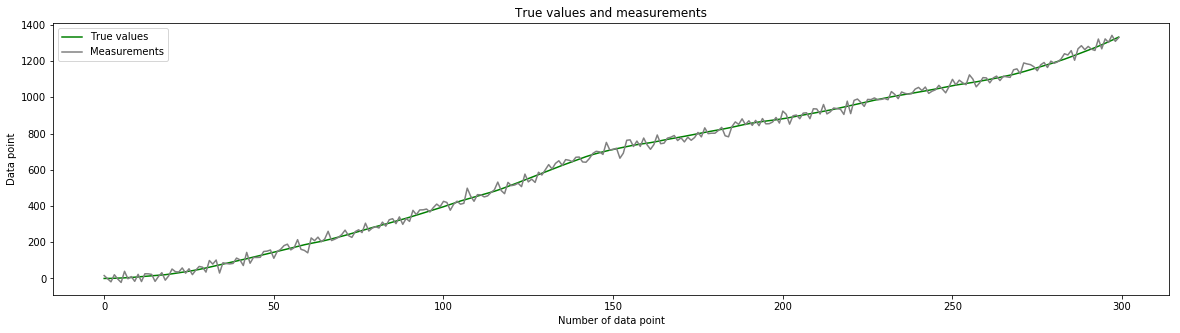

In [17]:
plt.figure(figsize=(20,5))
plt.plot(X, '-', color='green', label='True values')
plt.plot(Z, '-', color='gray', label='Measurements')
plt.title('True values and measurements')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements'], loc = 'best')

plt.show()


Let's now determine empirically the window size $M$ of running mean and smoothing coefficient $\alpha$ (forward exponential smoothing) that provide the best estimation of the process $X_i$ using measurements $Z_i$. As this process is not random walk model we can not apply equations for optimal smoothing coefficient, but the trajectory is very close to the line, whereas measurement errors are huge. This fact can help us.


In [18]:
#running mean test
M = 11
XRM = np.zeros(len(acc))

for i in range(int((M-1)/2), len(acc)-int((M-1)/2)):
    for k in range(i-int((M-1)/2), i+int((M-1)/2)):
        XRM[i] = XRM[i] + (1/M)*Z[k]
        
for i in range(len(acc)-int((M-1)/2), len(acc)):
    XRM[i] = Z[i]

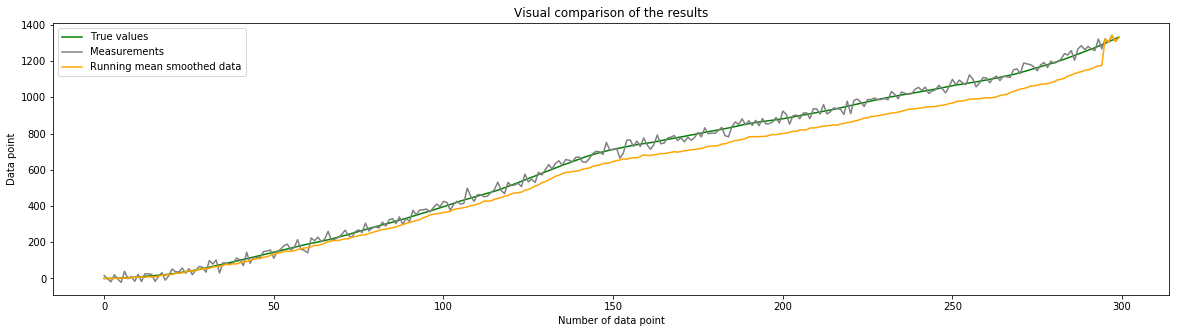

In [19]:
plt.figure(figsize=(20,5))
plt.plot(X, '-', color='green', label='True values')
plt.plot(Z, '-', color='gray', label='Measurements')
plt.plot(XRM, '-', color='orange', label='Running mean smoothed data')
plt.title('Visual comparison of the results')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements', 'Running mean smoothed data','Backward exp mean smoothed data'], loc = 'best')
plt.show()

For empirical estimation of $M$ we'll use deviation and variability indicators

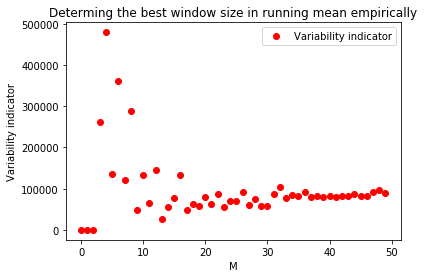

In [20]:
DIRM = np.zeros(50)
VIRM = np.zeros(50)
for M in range(1,50):
    XRM = np.zeros(len(acc))

    for i in range(int((M-1)/2), len(acc)-int((M-1)/2)):
        for k in range(i-int((M-1)/2), i+int((M-1)/2)):
            XRM[i] = XRM[i] + (1/M)*Z[k]
        
    for i in range(len(W)-int((M-1)/2), len(W)):
        XRM[i] = Z[i]
    
    
    for i in range(len(acc)):
        DIRM[M] += (Z[i] - XRM[i])**2
    
    for i in range(len(acc)-2):
        VIRM[M] += (XRM[i+2] - 2*XRM[i+1] + XRM[i])**2


plt.plot(VIRM, 'o', color='red')
plt.title('Determing the best window size in running mean empirically')
plt.ylabel('Variability indicator')
plt.xlabel('M')
plt.legend(['Variability indicator'], loc = 'best')
plt.show()

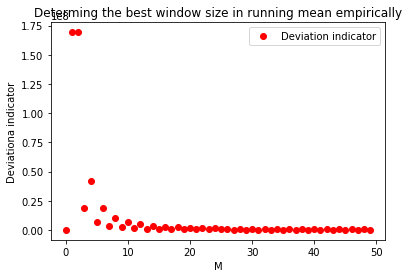

In [21]:
plt.plot(DIRM, 'o', color='red')
plt.title('Determing the best window size in running mean empirically')
plt.ylabel('Deviationa indicator')
plt.xlabel('M')
plt.legend(['Deviation indicator'], loc = 'best')
plt.show()

One can see that $M=13$ is optimal

For empirical estimation of $\alpha$ we'll also use deviation and variability indicators

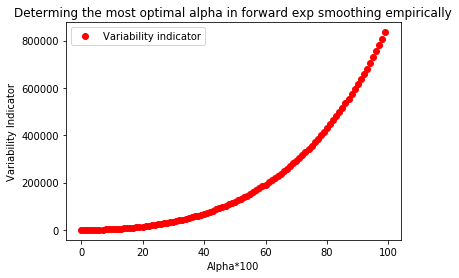

In [22]:
DIES = np.zeros(100)
VIES = np.zeros(100)
for alpha in range(1,100):
    XFES = np.zeros(len(acc))
    XFES[0] = X[0]

    for i in range(2,len(acc)):
        XFES[i] = XFES[i-1] + (alpha/100)*(Z[i]-XFES[i-1])
    
    
    for i in range(len(acc)):
        DIES[alpha] += (Z[i] - XFES[i])**2
    
    for i in range(len(acc)-2):
        VIES[alpha] += (XFES[i+2] - 2*XFES[i+1] + XFES[i])**2


plt.plot(VIES, 'o', color='red')
plt.title('Determing the most optimal alpha in forward exp smoothing empirically')
plt.ylabel('Variability Indicator')
plt.xlabel('Alpha*100')
plt.legend(['Variability indicator'], loc = 'best')
plt.show()

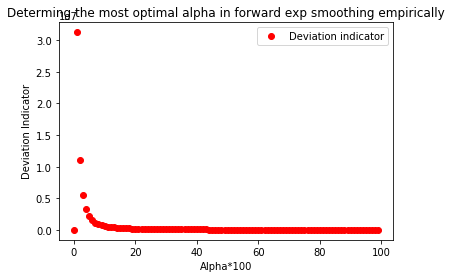

In [23]:
plt.plot(DIES, 'o', color='red')
plt.title('Determing the most optimal alpha in forward exp smoothing empirically')
plt.ylabel('Deviation Indicator')
plt.xlabel('Alpha*100')
plt.legend(['Deviation indicator'], loc = 'best')
plt.show()

$\alpha \in [0.2, 0.3]$ is optimal

Second trajectory

Let's generate a cyclic trajectory $Y_i$ according to the equation
$$
Y_i = A_i \sin(\omega i +3)
$$
$$
A_i = A_{i-1} + p_i
$$
Period of oscillations is T=32 steps, thus 
$$
\omega = \cfrac{2 \pi}{T} \approx 0.196
$$
$w_i$ – normally distributed random noise with zero mathematical expectation and variance $\sigma_w^2 = 0.08^2$
Initial conditions: $A_1 = 1$

Also the measurement noise will be as follows: zero mathematical expression and $\sigma_\eta^2 = 0.05$

In [24]:
#noise of amplitude's change
p = np.random.normal(loc=0.0, scale=0.08, size=200)

In [25]:
#steps, amplitude, period
Y = np.zeros(len(p))
A = np.zeros(len(p))
A[0] = 1
T = 32

In [27]:
#trajectory
for i in range(len(p)):
    A[i] = A[i-1] + p[i]    
    Y[i] = A[i]*np.sin(2*np.pi*i/T +3)

In [28]:
#noise of measurements
sigmaeta = np.sqrt(0.05)
eta = np.random.normal(loc=0.0, scale=sigmaeta, size=200)

In [29]:
#measurements of the steps
Z = np.zeros(len(p))
for i in range(len(p)):
    Z[i] = Y[i] + eta[i]

Let's apply running mean with window size $M=13$ to measurements $Z_i$

In [33]:
#running mean test
M = 13
YRM = np.zeros(len(p))

for i in range(int((M-1)/2), len(p)-int((M-1)/2)):
    for k in range(i-int((M-1)/2), i+int((M-1)/2)):
        YRM[i] = YRM[i] + (1/M)*Z[k]
        
for i in range(len(p)-int((M-1)/2), len(p)):
    YRM[i] = Z[i]

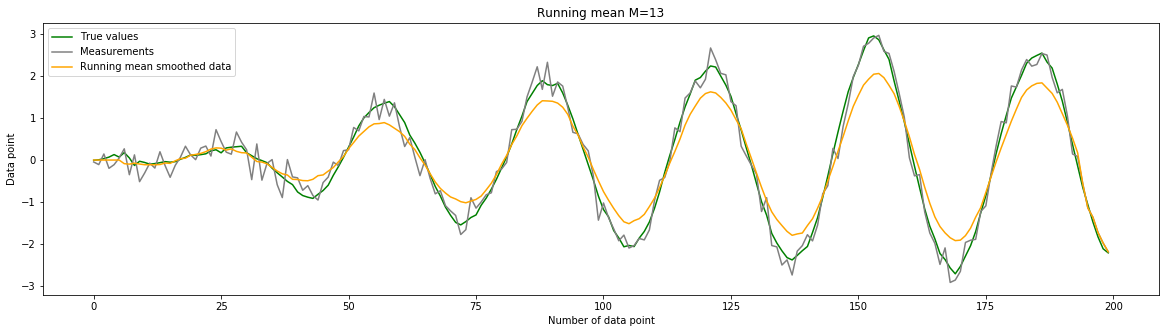

In [34]:
plt.figure(figsize=(20,5))
plt.plot(Y, '-', color='green', label='True values')
plt.plot(Z, '-', color='gray', label='Measurements')
plt.plot(YRM, '-', color='orange', label='Running mean smoothed data')
plt.title('Running mean M=13')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements', 'Running mean smoothed data'], loc = 'best')
plt.show()

Now we will determine the period of oscillations $T$ for which running mean with given $M=21$:

a) produces inverse oscillations, that is $T$ should be a little bigger than $M/2$

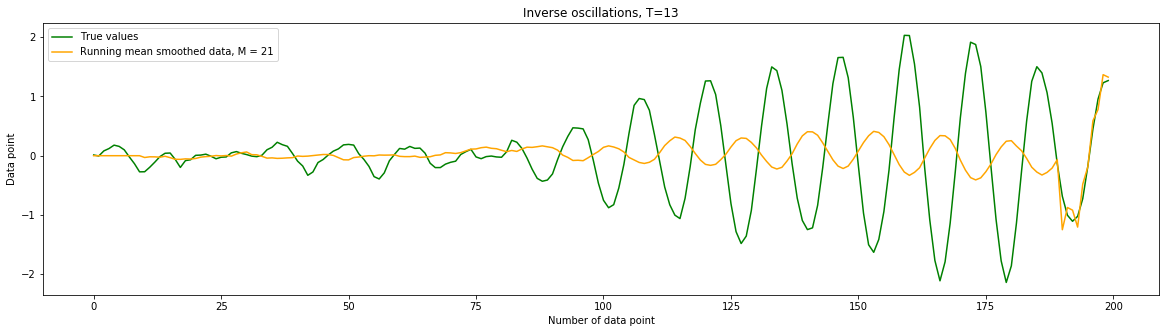

In [47]:
T=13
p = np.random.normal(loc=0.0, scale=0.08, size=200)
M = 21
Y = np.zeros(len(p))
A = np.zeros(len(p))
A[0] = 1
for i in range(len(p)):
    A[i] = A[i-1] + p[i]    
    Y[i] = A[i]*np.sin(2*np.pi*i/T +3)
sigmaeta = np.sqrt(0.05)
eta = np.random.normal(loc=0.0, scale=sigmaeta, size=200)
Z = np.zeros(len(p))
for i in range(len(p)):
    Z[i] = Y[i] + eta[i]


YRM = np.zeros(len(p))


for i in range(int((M-1)/2), len(p)-int((M-1)/2)):
    for k in range(i-int((M-1)/2), i+int((M-1)/2)):
        YRM[i] = YRM[i] + (1/M)*Z[k]

for i in range(len(p)-int((M-1)/2), len(p)):
    YRM[i] = Z[i]

plt.figure(figsize=(20,5))
plt.plot(Y, '-', color='green', label='True values')
plt.plot(YRM, '-', color='orange', label='Running mean smoothed data')
plt.title('Inverse oscillations, T=13')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Running mean smoothed data, M = 21'], loc = 'best')
plt.show()

b) leads to the loss of oscillations (zero oscillations), that is $T=M/2$

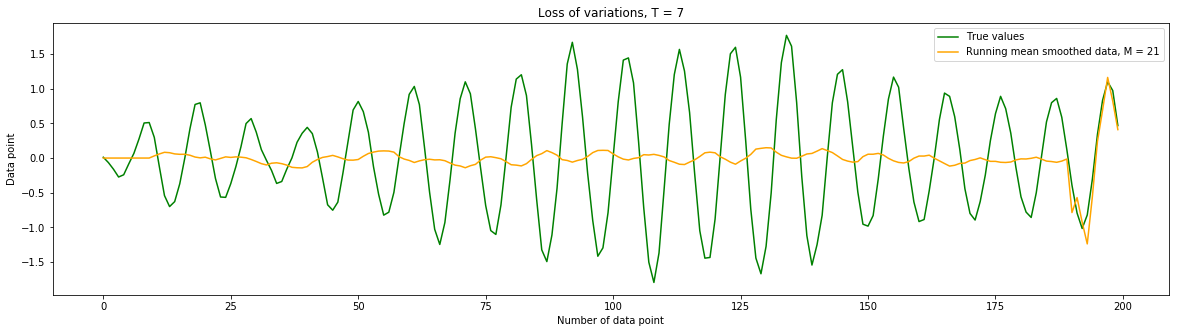

In [48]:
T=10.5
p = np.random.normal(loc=0.0, scale=0.08, size=200)
M = 21
Y = np.zeros(len(p))
A = np.zeros(len(p))
A[0] = 1
for i in range(len(p)):
    A[i] = A[i-1] + p[i]    
    Y[i] = A[i]*np.sin(2*np.pi*i/T +3)
sigmaeta = np.sqrt(0.05)
eta = np.random.normal(loc=0.0, scale=sigmaeta, size=200)
Z = np.zeros(len(p))
for i in range(len(p)):
    Z[i] = Y[i] + eta[i]


YRM = np.zeros(len(p))


for i in range(int((M-1)/2), len(p)-int((M-1)/2)):
    for k in range(i-int((M-1)/2), i+int((M-1)/2)):
        YRM[i] = YRM[i] + (1/M)*Z[k]

for i in range(len(p)-int((M-1)/2), len(p)):
    YRM[i] = Z[i]

plt.figure(figsize=(20,5))
plt.plot(Y, '-', color='green', label='True values')
plt.plot(YRM, '-', color='orange', label='Running mean smoothed data')
plt.title('Loss of variations, T = 7')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Running mean smoothed data, M = 21'], loc = 'best')
plt.show()

c) changes the oscillations insignificantly, that is $T>M$

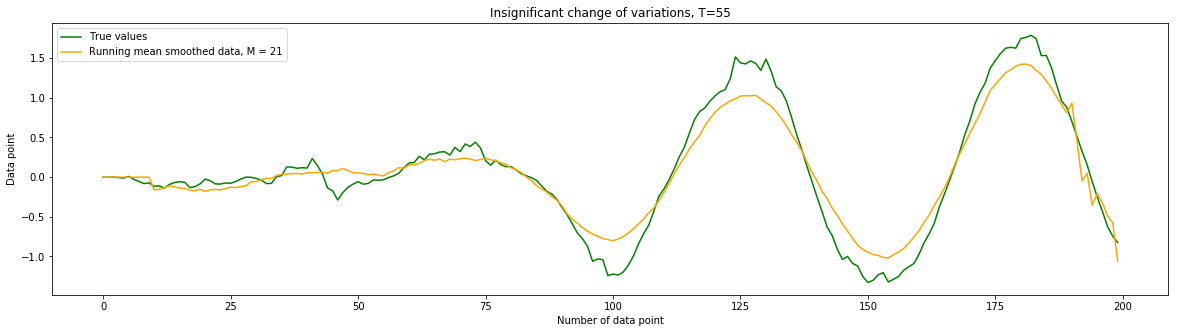

In [52]:
T = 55
p = np.random.normal(loc=0.0, scale=0.08, size=200)
M = 21
Y = np.zeros(len(p))
A = np.zeros(len(p))
A[0] = 1
for i in range(len(p)):
    A[i] = A[i-1] + p[i]    
    Y[i] = A[i]*np.sin(2*np.pi*i/T +3)
sigmaeta = np.sqrt(0.05)
eta = np.random.normal(loc=0.0, scale=sigmaeta, size=200)
Z = np.zeros(len(p))
for i in range(len(p)):
    Z[i] = Y[i] + eta[i]


YRM = np.zeros(len(p))


for i in range(int((M-1)/2), len(p)-int((M-1)/2)):
    for k in range(i-int((M-1)/2), i+int((M-1)/2)):
        YRM[i] = YRM[i] + (1/M)*Z[k]

for i in range(len(p)-int((M-1)/2), len(p)):
    YRM[i] = Z[i]

plt.figure(figsize=(20,5))
plt.plot(Y, '-', color='green', label='True values')
plt.plot(YRM, '-', color='orange', label='Running mean smoothed data')
plt.title('Insignificant change of variations, T=55')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Running mean smoothed data, M = 21'], loc = 'best')
plt.show()